# Rainfall Prediction Using Indigenous Knowledge
---

## 1. Introduction

Accurate rainfall prediction is crucial for agriculture. In this project, we explore how **indigenous knowledge** — local farmers’ forecasts based on natural indicators — can be modeled to predict rainfall events.

Farmers provide predictions about **rainfall intensity** (none, small, medium, heavy) along with their **confidence levels**, as well as the **natural signs** they observed (e.g., cloud formations, wind patterns). These forecasts are later compared with the **actual observed rainfall** (`Target`).

The objective of this project is to:

* Uncover Insights

### 🔧 Libraries Used

We will use the following Python libraries:

* **pandas** → data manipulation and cleaning
* **numpy** → numerical operations
* **matplotlib** & **seaborn** → data visualization
---

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [3]:
# Style to use for plotting
plt.style.use('ggplot')

In [4]:
# File path to the training dataset (used for model training and validation)
TRAIN_PATH = "~/documents/kamau_wa_wainaina_journey/programming_rebirth/Data/ghana_indigenous_knowledge/ghana_indigenous_knowledge_train.csv"
  
# File path to the test dataset (used for final inference)
TEST_PATH = "~/documents/kamau_wa_wainaina_journey/programming_rebirth/Data/ghana_indigenous_knowledge/ghana_indigenous_knowledge_test.csv"  

In [ ]:
# Reading data into dataframes
train_data = pd.read_csv(TRAIN_PATH) # pyright: ignore[reportUnknownMemberType]
test_data = pd.read_csv(TEST_PATH)

In [6]:
# Top five records displayed
print("="*50 + "TRAIN DATA" + "="*50)
display(train_data.head())
print("="*50 + "TEST DATA" + "="*50)
display(test_data.head())

==================================================TRAIN DATA==================================================


,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,indicator,indicator_description,time_observed,Target,forecast_length
0,ID_KwcTp_12,11,0.3,0.0,Tumfa,atiwa_west,2025-05-30 11:09:33,NaN,NaN,NaN,MEDIUMRAIN,12
1,ID_K9vWT_12,17,0.3,0.0,Kwabeng,atiwa_west,2025-05-30 11:09:35,NaN,NaN,NaN,HEAVYRAIN,12
2,ID_AIQg3_12,19,0.3,0.0,Akropong,atiwa_west,2025-05-30 11:09:47,NaN,NaN,NaN,MEDIUMRAIN,12
3,ID_px4yf_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:33,NaN,NaN,NaN,HEAVYRAIN,12
4,ID_QYYmK_12,23,0.3,0.0,Asamama,atiwa_west,2025-05-30 11:16:55,NaN,NaN,NaN,HEAVYRAIN,12


==================================================TEST DATA==================================================


,ID,user_id,confidence,predicted_intensity,community,district,prediction_time,indicator,indicator_description,time_observed,forecast_length
0,ID_SbTdy_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:28,NaN,NaN,NaN,24
1,ID_SBKYz_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:29,NaN,NaN,NaN,24
2,ID_fAimg_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:30,NaN,NaN,NaN,24
3,ID_2wBqC_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:31,NaN,NaN,NaN,24
4,ID_NItox_24,77,0.3,0.0,ASSIN BROFOYEDUR,assin_fosu,2025-07-20 19:27:32,NaN,NaN,NaN,24


In [7]:
# Quick summary statistics
print("="*50 + "NUMERIC" + "="*50)
display(train_data.describe())
print("="*50 + "CATEGORICAL" + "="*50)
display(train_data.describe(include=["O"]))

==================================================NUMERIC==================================================


,user_id,confidence,predicted_intensity,forecast_length
count,10928.000000,10928.000000,10928.000000,10928.000000
mean,40.534407,0.540474,0.026830,19.135432
std,22.970174,0.272068,0.132468,5.891856
min,7.000000,0.300000,0.000000,12.000000
25%,20.000000,0.300000,0.000000,12.000000
50%,43.000000,0.600000,0.000000,24.000000
75%,62.000000,0.600000,0.000000,24.000000
max,90.000000,1.000000,1.000000,24.000000


==================================================CATEGORICAL==================================================


,ID,community,district,prediction_time,indicator,indicator_description,time_observed,Target
count,10928,10928,10928,10928,503,346,72,10928
unique,10928,38,3,10887,10,28,8,4
top,ID_KwcTp_12,Akwaduuso,atiwa_west,2025-06-30 19:16:50,clouds,Clouds moving South → East,EVENING,NORAIN
freq,1,1427,4877,2,266,52,17,9612


In [8]:
# Quick summary statistics
print("="*50 + "NUMERIC" + "="*50)
display(test_data.describe())
print("="*50 + "CATEGORICAL" + "="*50)
display(test_data.describe(include=["O"]))

==================================================NUMERIC==================================================


,user_id,confidence,predicted_intensity,forecast_length
count,2732.000000,2732.000000,2732.000000,2732.000000
mean,43.156662,0.460761,0.027786,18.127379
std,26.611867,0.236471,0.102371,5.999746
min,7.000000,0.300000,0.000000,12.000000
25%,18.000000,0.300000,0.000000,12.000000
50%,26.000000,0.300000,0.000000,24.000000
75%,64.500000,0.600000,0.000000,24.000000
max,95.000000,1.000000,1.000000,24.000000


==================================================CATEGORICAL==================================================


,ID,community,district,prediction_time,indicator,indicator_description,time_observed
count,2732,2732,2732,2732,205,205,205
unique,2732,33,3,2729,9,23,8
top,ID_SbTdy_24,Akwaduuso,assin_fosu,2025-07-23 08:03:10,clouds,Cloud (probably cumulus) without visible sky,EARLY_MORNING
freq,1,774,1257,2,144,49,49


In [9]:
# Information about our dataframes
print("="*50 + "TRAIN INFO" + "="*50)
display(train_data.info())
print("="*50 + "TEST INFO" + "="*50)
display(test_data.info())

==================================================TRAIN INFO==================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10928 entries, 0 to 10927
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10928 non-null  object 
 1   user_id                10928 non-null  int64  
 2   confidence             10928 non-null  float64
 3   predicted_intensity    10928 non-null  float64
 4   community              10928 non-null  object 
 5   district               10928 non-null  object 
 6   prediction_time        10928 non-null  object 
 7   indicator              503 non-null    object 
 8   indicator_description  346 non-null    object 
 9   time_observed          72 non-null     object 
 10  Target                 10928 non-null  object 
 11  forecast_length        10928 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage

None

==================================================TEST INFO==================================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2732 non-null   object 
 1   user_id                2732 non-null   int64  
 2   confidence             2732 non-null   float64
 3   predicted_intensity    2732 non-null   float64
 4   community              2732 non-null   object 
 5   district               2732 non-null   object 
 6   prediction_time        2732 non-null   object 
 7   indicator              205 non-null    object 
 8   indicator_description  205 non-null    object 
 9   time_observed          205 non-null    object 
 10  forecast_length        2732 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 234.9+ KB


None

### Helper Functions

In [10]:
def prediction_target_combination(col_of_interest: str, prediction: str, target: str, df: pd.DataFrame) -> pd.DataFrame:
    """
    Compare the frequency distribution of predictions vs. actual targets 
    for a given column of interest.

    Parameters
    ----------
    col_of_interest : str
        Column used for grouping (e.g., 'district', 'community').
    prediction : str
        Column name containing predicted values (e.g., 'predicted_intensity').
    target : str
        Column name containing ground truth labels (e.g., 'Target').
    df : pd.DataFrame
        Input dataframe containing the columns above.

    Returns
    -------
    pd.DataFrame
        A melted dataframe with columns:
        - col_of_interest (grouping variable)
        - prediction (predicted class values)
        - type_prediction ('ground_truth' or 'prediction')
        - frequency (count for each group)
        - rainfall_intensity (renamed from prediction column)
    """

    # Count actual occurrences (ground truth frequencies)
    target_grouped = (
        df.groupby([col_of_interest, target])
          .agg(ground_truth=(target, "count"))
          .reset_index()
    )

    # Count predicted occurrences (predicted frequencies)
    prediction_grouped = (
        df.groupby([col_of_interest, prediction])
          .agg(prediction=(prediction, "count"))
          .reset_index()
    )

    # Merge both on col_of_interest + values
    target_prediction_merged = target_grouped.merge(
        prediction_grouped,
        left_on=[col_of_interest, target],
        right_on=[col_of_interest, prediction],
        how="outer"  
    )

    # Just incase predicted intensity is null due to merge, replace it with value from target intensity
    target_prediction_merged[prediction].loc[target_prediction_merged[prediction].isnull()] = target_prediction_merged[target]

    # Reshape into long format for comparison
    final_df = pd.melt(
        target_prediction_merged[
            [col_of_interest, prediction, "ground_truth", "prediction"]
        ],
        id_vars=[col_of_interest, prediction]
    )
    
    # If no value due to merge, replace with 0 since it doesn't exist
    final_df['value'].loc[final_df['value'].isnull()] = 0 
    

    # Rename columns for clarity
    return final_df.rename(
        columns={
            "variable": "type_prediction",
            "value": "frequency",
            prediction: "rainfall_intensity"
        }
    )


In [11]:
def calculate_grouped_accuracy(mapper: dict, index: int, df: pd.DataFrame) -> None:
    """
    Calculate prediction accuracy for groups in a dataframe.

    Parameters
    ----------
    mapper : dict
        Dictionary where keys are group values (e.g., district/community),
        and values are lists of two integers [correct_predictions, total_predictions].
    index : int
        Position of the column in the dataframe row tuple.
    df : pd.DataFrame
        Input dataframe with at least 'predicted_intensity' and 'Target' columns.

    Returns
    -------
    numpy array 
    """

    # Iterate through dataframe rows efficiently as named tuples
    for row in df.itertuples(index=False):
        # Update correct predictions if prediction matches target
        if row.predicted_intensity == row.Target:
            mapper[row[index]][0] += 1
        # Always update total predictions count
        mapper[row[index]][1] += 1

    # Calculate accuracy 
    for variable, value in mapper.items():
        accuracy = value[0] / value[1]
        mapper[variable] = accuracy
        
    # Sort accuracy in ascending order
    mapper_to_list = list(mapper.items())
    mapper_to_list = sorted(mapper_to_list, 
                            key=lambda pair: pair[1],
                            reverse=True)

    return np.array(mapper_to_list)


In [12]:
def clean_text(text: str) -> str:
    """
    Normalize a text by converting it to lowercase while preserving word boundaries.

    Parameters
    ----------
    community : str
        The community name as a string (e.g., 'Green Valley').

    Returns
    -------
    str
        Cleaned community name in lowercase (e.g., 'green valley').
    """
    # Split the name into words and thereafter convert each word to lowercase
    text_split = text.split()
    text_lower = [word.lower() for word in text_split]

    # Rejoin words with spaces
    return " ".join(text_lower)


In [13]:
# def calculate_accuracy(correct_count: int, df: pd.DataFrame) -> int:
#     """
#     Calculate the overall prediction accuracy for a given dataframe.

#     Parameters
#     ----------
#     correct_count : int
#         Initial count of correct predictions (usually set to 0).
#     df : pd.DataFrame
#         Dataframe containing at least 'predicted_intensity' and 'Target' columns.

#     Returns
#     -------
#     float
#         Accuracy of predictions as a percentage, rounded to the nearest integer.
#     """

#     # Iterate through rows of the dataframe
#     for row in df.itertuples(index=False):
#         # Increment correct_count when prediction matches target
#         if row.predicted_intensity == row.Target:
#             correct_count += 1

#     # Compute accuracy = correct predictions / total predictions
#     return round((correct_count / len(df)) * 100)


---
## 2. Exploratory Data Analysis (EDA)

Before building models, we first need to understand the data. Our goal is to uncover insights about farmer predictions, natural indicators, and rainfall patterns. 

---

In [14]:
# For now, let's not edit our raw data
eda_data = train_data.copy(deep=True)

---
### 📊 Distribution & Balance

* What is the distribution of rainfall intensities in the dataset - `Predicted` and `Target`?
* How confident are farmers overall?
---

In [15]:
# Confidence and predicted_intensity are categorical, thus changing their values for enriched analysis
confidence_mapper = {0.3: "Low", 0.6: "Medium", 1.: "High"}
predicted_intensity_mapper = {0.:'NORAIN', 0.33:'SMALLRAIN', 0.66:'MEDIUMRAIN', 1.:'HEAVYRAIN'}

eda_data["confidence"] = eda_data["confidence"].map(confidence_mapper)
eda_data["predicted_intensity"] = eda_data["predicted_intensity"].map(predicted_intensity_mapper)

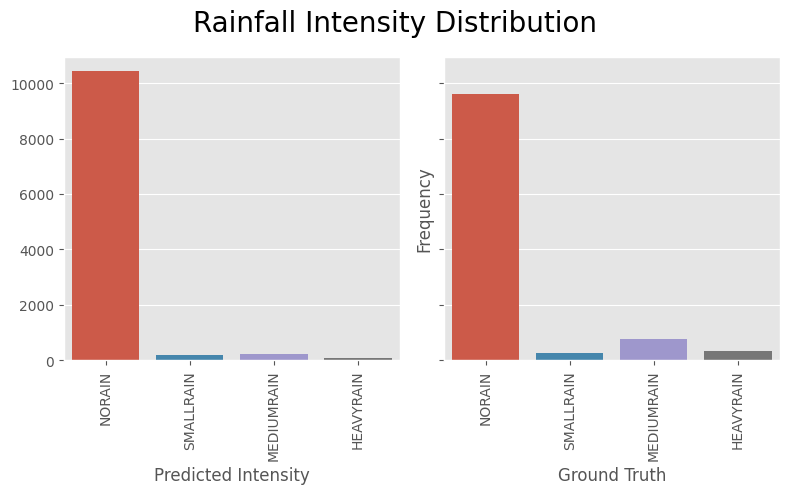

In [16]:
# Distribution of predicted intensity and ground truth intensity
fig, ax = plt.subplots(nrows=1, 
                       ncols= 2, 
                       sharey=True, 
                       figsize=(8,5))
sns.countplot(data=eda_data, 
              x='predicted_intensity', 
              order=['NORAIN', 'SMALLRAIN','MEDIUMRAIN', 'HEAVYRAIN'],
              ax=ax[0])
sns.countplot(data=eda_data, 
              x='Target', 
              order=['NORAIN', 'SMALLRAIN','MEDIUMRAIN', 'HEAVYRAIN'],
              ax=ax[1])

ax[0].set_xlabel("Predicted Intensity")
ax[0].set_ylabel("")
ax[0].tick_params(axis='x', rotation=90)
ax[1].set_xlabel("Ground Truth")
ax[1].set_ylabel("Frequency")
ax[1].tick_params(axis='x', rotation=90)
fig.suptitle(t="Rainfall Intensity Distribution", size=20)
fig.tight_layout()
plt.show()

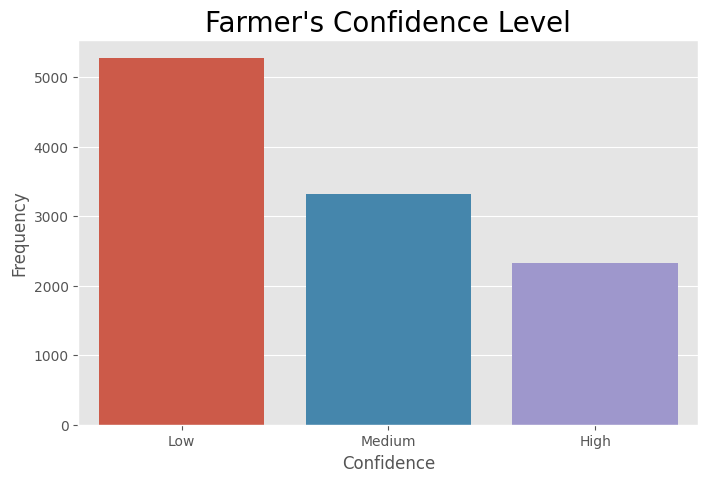

In [17]:
# Count of each confidence type
fig, ax = plt.subplots(figsize=(8,5))

sns.countplot(data=eda_data, 
              x='confidence',
              ax=ax)
ax.set_title("Farmer's Confidence Level", size=20)
ax.set_xlabel("Confidence")
ax.set_ylabel("Frequency")
plt.show()

---
### 🌍 Geographic & Community Patterns

* Do certain **districts or communities** show higher forecast accuracy?
* Are there geographic differences in rainfall intensity?
---

In [18]:
district_correct_prediction = {"assin_fosu": [0, 0], "atiwa_west": [0, 0], "obuasi_east": [0, 0]}
district_accuracy = calculate_grouped_accuracy(district_correct_prediction, 5, eda_data)

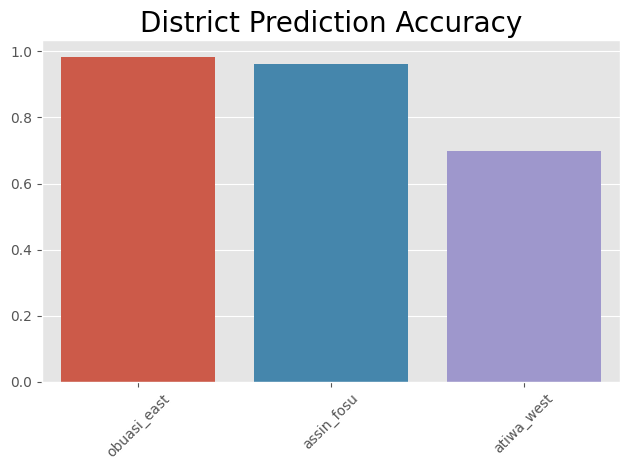

In [19]:
fig, ax = plt.subplots()
sns.barplot(x=district_accuracy[:, 0],
            y=district_accuracy[:, 1].astype(float))
ax.set_title("District Prediction Accuracy", 
             size=20)
ax.tick_params(axis="x", 
               rotation=45)
fig.tight_layout()
plt.show()

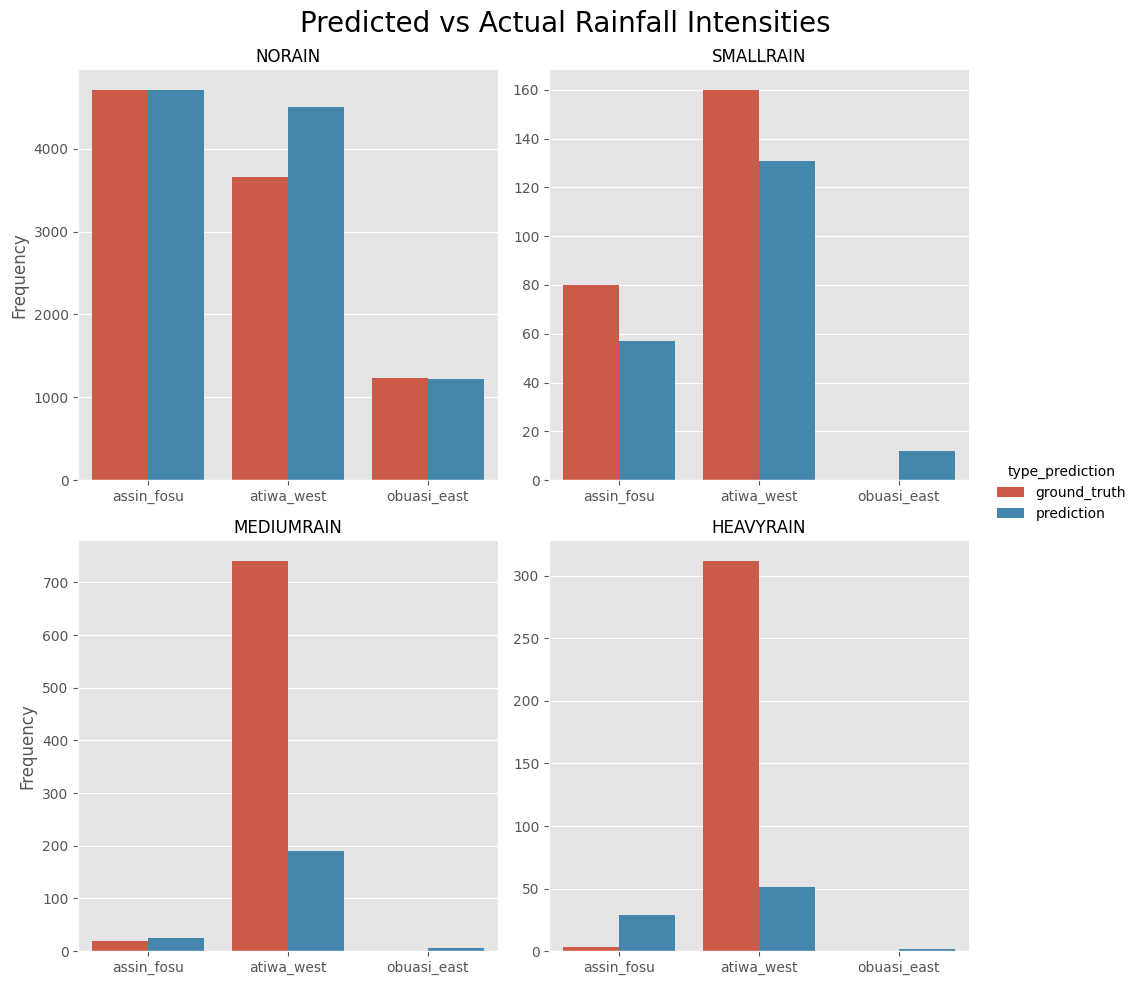

In [20]:
district_eda_data = prediction_target_combination("district", "predicted_intensity", "Target", eda_data)

g = sns.catplot(data=district_eda_data, 
                x='district', 
                y='frequency', 
                hue='type_prediction', 
                col='rainfall_intensity', 
                col_order = ['NORAIN', 'SMALLRAIN', 'MEDIUMRAIN', 'HEAVYRAIN'], 
                col_wrap=2, 
                sharex=False,
                sharey=False,
                kind='bar')
g.figure.suptitle("Predicted vs Actual Rainfall Intensities", 
                  size=20)
g.set_titles("{col_name}")
g.set_axis_labels("", "Frequency")
g.tight_layout()
plt.show()

In [21]:
eda_data["community"] = eda_data["community"].apply(clean_text)

community_correct_prediction = {'tumfa': [0, 0], 'kwabeng': [0, 0], 'akropong': [0, 0], 'asamama': [0, 0], 'akwaduuso': [0, 0], 'banso': [0, 0],
                               'awenare': [0, 0], 'mouso': [0, 0], 'abomosu': [0, 0], 'foso odumasi': [0, 0], 'amonom': [0, 0], 'asunafo': [0, 0],
                               'apampatia': [0, 0], 'assin atonsu': [0, 0], 'odumasi': [0, 0], 'assin wurakese': [0, 0],'odumasi adansi': [0, 0], 
                               'assin aponsie': [0, 0], 'assin nyankomasi': [0, 0],'assin foso odumasi': [0, 0], 'assin mesre nyame': [0, 0], 
                               'assin brofoyedur': [0, 0],'mampamhwe': [0, 0], 'atonsu': [0, 0]}

community_accuracy = calculate_grouped_accuracy(community_correct_prediction, 4, eda_data)

In [22]:
community_district = eda_data.groupby(['community', 'district'])
community_district = pd.DataFrame(community_district.groups.keys(), columns=['community', 'district'])
community_accuracy = pd.DataFrame(community_accuracy, columns=['community', 'accuracy'])
community_accuracy = community_accuracy.merge(community_district, on='community')
community_accuracy['accuracy'] = community_accuracy['accuracy'].astype(float)

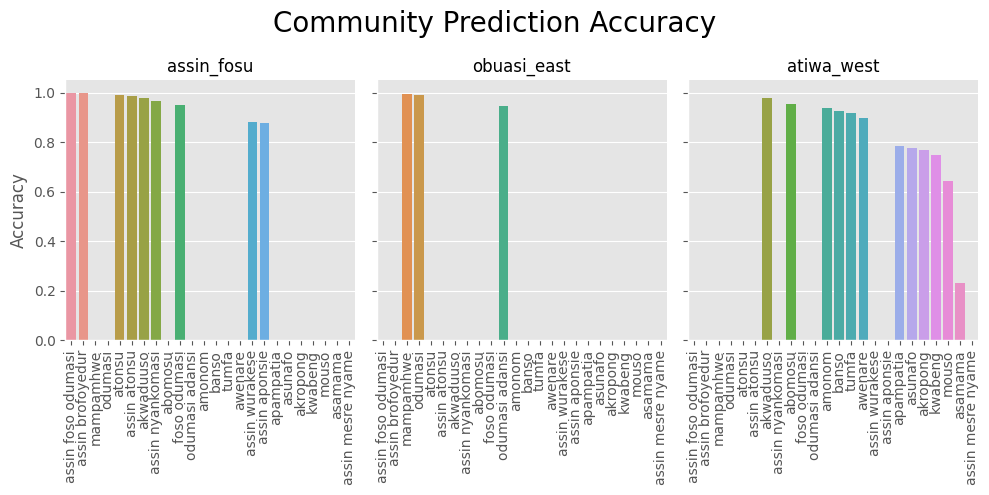

In [23]:
g = sns.catplot(x='community',
                y='accuracy',
                col='district',
                kind='bar',
                data=community_accuracy)
g.figure.suptitle("Community Prediction Accuracy", size=20)
g.set_titles("{col_name}")
g.set_axis_labels("", "Accuracy")
g.tick_params(axis="x", rotation=90)
g.fig.set_size_inches(10, 5)
g.fig.tight_layout()
plt.show()

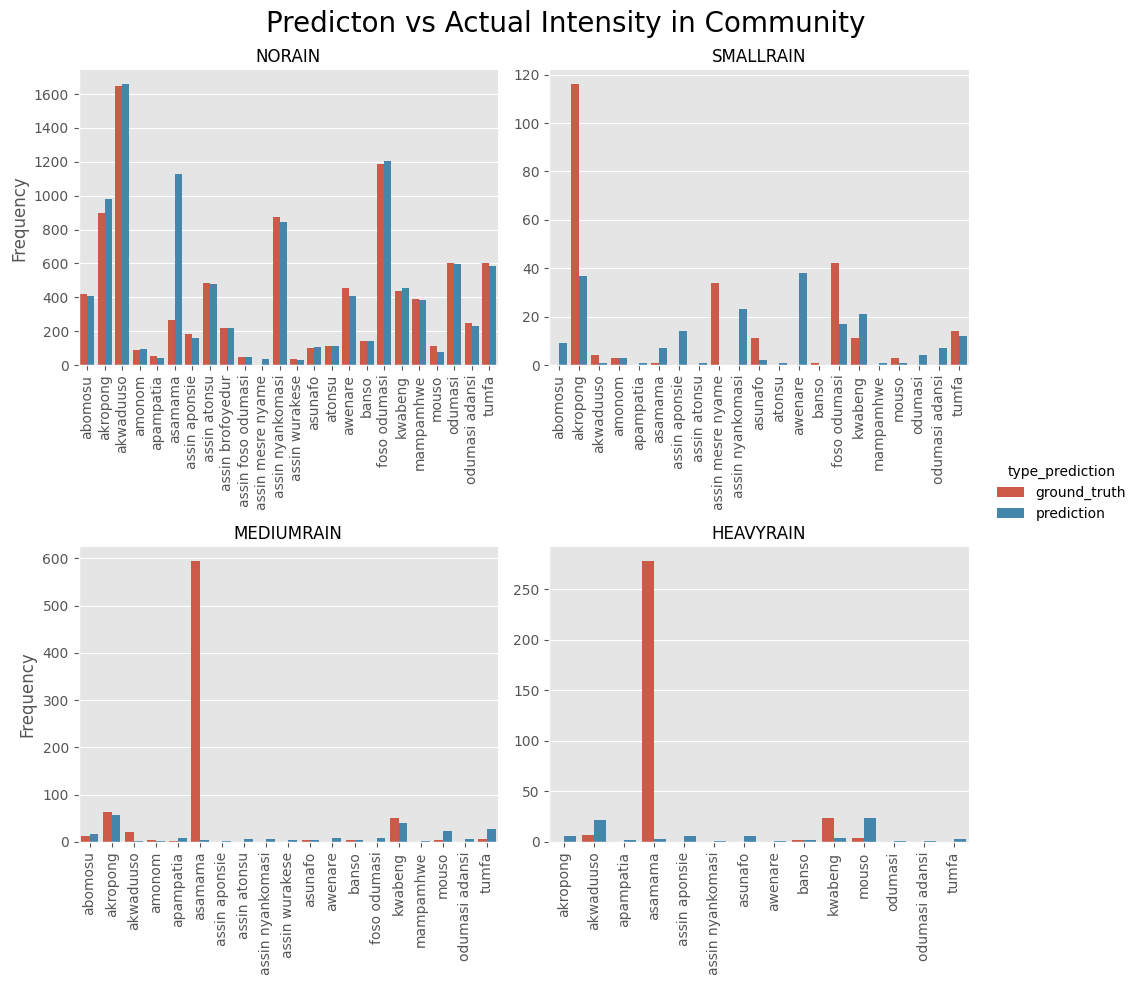

In [24]:
community_eda_data = prediction_target_combination("community", "predicted_intensity", "Target", eda_data)

g = sns.catplot(data=community_eda_data, 
                x='community', 
                y='frequency',
                hue='type_prediction', 
                col='rainfall_intensity', 
                col_order = ['NORAIN', 'SMALLRAIN', 'MEDIUMRAIN', 'HEAVYRAIN'], 
                col_wrap=2, 
                sharex=False,
                sharey=False,
                kind='bar')
g.figure.suptitle("Predicton vs Actual Intensity in Community", size=20)
g.set_axis_labels("", "Frequency")
g.set_titles("{col_name}")
g.tick_params(axis="x", rotation=90)
g.tight_layout()
plt.savefig("community_predictons.png", dpi=300, bbox_inches='tight')
plt.show()

---
### ⏳ Temporal Patterns

* How does prediction accuracy vary by **season or month**?
* Are **short-term forecasts** (lower `forecast_length`) more accurate than long-term forecasts?
---

In [25]:
eda_data['prediction_time'] = pd.to_datetime(eda_data['prediction_time'])
# Extract datetime components
eda_data["month"] = eda_data["prediction_time"].dt.month
eda_data["day"] = eda_data["prediction_time"].dt.day
eda_data["hour"] = eda_data["prediction_time"].dt.hour
eda_data["weekday"] = eda_data["prediction_time"].dt.day_name()

In [26]:
eda_data['month'] = eda_data['month'].map({5: 'May', 6: 'June', 7: 'July'})

In [27]:
eda_data['month'].value_counts()

month
July    7272
June    3639
May       17
Name: count, dtype: int64

In [28]:
eda_data['day'].value_counts()

day
17    809
15    715
16    681
18    544
14    542
19    469
27    452
12    441
13    423
11    398
10    376
5     358
30    353
20    352
7     341
26    333
28    325
2     312
4     306
1     283
3     276
8     256
25    250
6     244
9     225
29    208
22    200
21    186
23    168
24    102
Name: count, dtype: int64

In [29]:
eda_data['hour'].value_counts()

hour
18    1396
7     1104
17    1069
19     819
8      774
6      706
16     689
20     574
9      495
15     394
11     332
13     329
14     319
10     316
5      293
22     264
12     260
21     251
23     134
4      117
0       97
3       80
2       63
1       53
Name: count, dtype: int64

In [30]:
eda_data['weekday'].value_counts()

weekday
Thursday     1885
Friday       1841
Saturday     1682
Wednesday    1503
Tuesday      1394
Monday       1362
Sunday       1261
Name: count, dtype: int64

In [31]:
month_correct_prediction = {'May': [0, 0], 'June': [0, 0], 'July': [0, 0]}
month_accuracy = calculate_grouped_accuracy(month_correct_prediction, 12, eda_data)

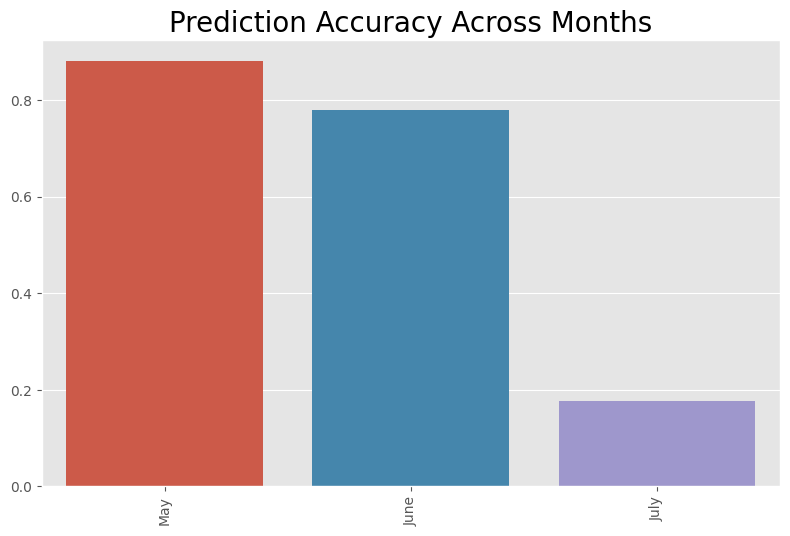

In [32]:
fig, ax = plt.subplots(figsize=(8 ,5))
sns.barplot(x=month_accuracy[:, 0], 
            y=month_accuracy[:, 1].astype(float))
fig.tight_layout()
ax.set_title("Prediction Accuracy Across Months", size=20)
ax.set_xticks([0, 1, 2], ["May", "June", "July"])
ax.tick_params(axis="x", rotation=90)
plt.show()

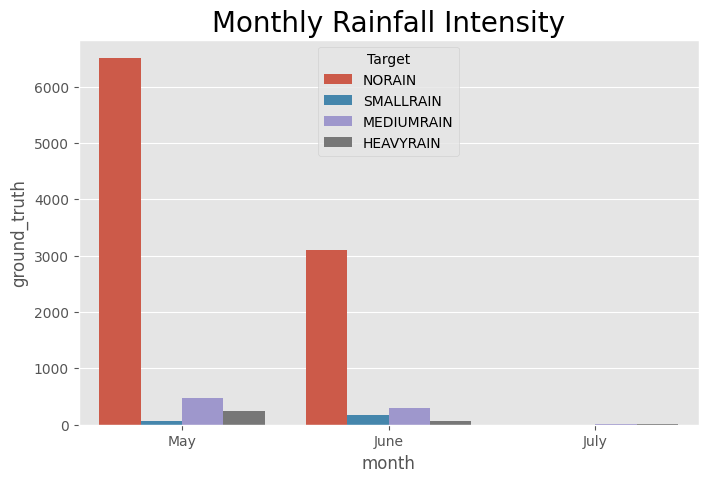

In [33]:
monthly_rainfall_intensity = eda_data.groupby(['month', 'Target']) \
                            .agg({'Target': 'count'}).rename(columns={'Target': 'ground_truth'}).reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='month', 
            y='ground_truth',
            hue='Target', 
            hue_order=['NORAIN', 'SMALLRAIN', 'MEDIUMRAIN', 'HEAVYRAIN'],
            ax=ax,
            data=monthly_rainfall_intensity)
ax.set_title("Monthly Rainfall Intensity", size=20)
ax.set_xticks([0, 1, 2], ["May", "June", "July"])
plt.show()

In [34]:
day_correct_prediction = {30: [0, 0], 1: [0, 0],  3: [0, 0], 4: [0, 0], 5: [0, 0],  
                          6: [0, 0], 7: [0, 0],  8: [0, 0], 9: [0, 0], 10: [0, 0], 
                          11: [0, 0], 12: [0, 0], 13: [0, 0], 14: [0, 0], 15: [0, 0],
                          16: [0, 0], 17: [0, 0], 18: [0, 0], 19: [0, 0], 20: [0, 0], 
                          21: [0, 0], 22: [0, 0], 23: [0, 0], 24: [0, 0], 25: [0, 0], 
                          26: [0, 0], 27: [0, 0], 28: [0, 0], 29: [0, 0],  2: [0, 0]}
day_accuracy = calculate_grouped_accuracy(day_correct_prediction, 13, eda_data)

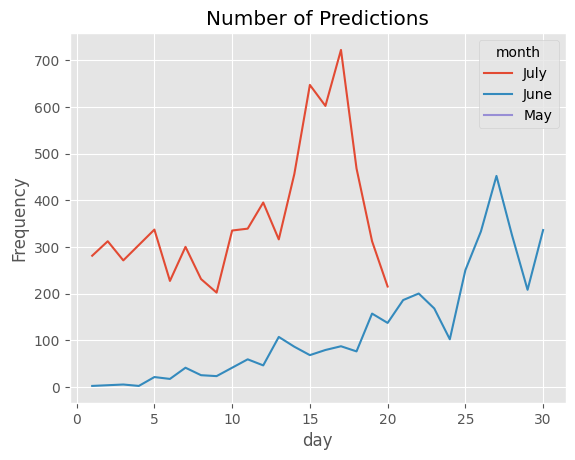

In [35]:
days = eda_data.groupby(['month', 'day']).agg({'ID': 'count'}).reset_index()
days = days.sort_values(by=['month', 'day'])
sns.lineplot(x='day',y='ID', hue='month', data=days)
plt.title('Number of Predictions')
plt.ylabel('Frequency')
plt.show()

In [36]:
eda_data['correct_prediction'] = eda_data['predicted_intensity'] == eda_data['Target']

In [37]:
month_day_accuracy = eda_data.groupby(['month', 'day']).agg({'correct_prediction': 'sum', 'ID': 'count'})
month_day_accuracy['accuracy'] = round((month_day_accuracy['correct_prediction']/month_day_accuracy['ID'])*100)
month_day_accuracy = month_day_accuracy.sort_values(by=['month', 'day'])

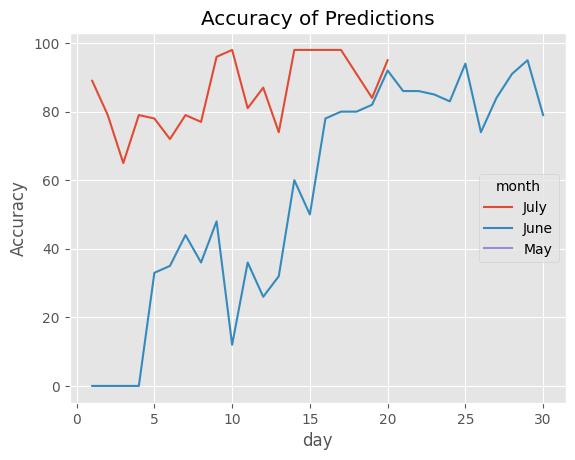

In [38]:
sns.lineplot(x='day',y='accuracy', hue='month', data=month_day_accuracy)
plt.title('Accuracy of Predictions')
plt.ylabel('Accuracy')
plt.show()

In [39]:
weekday_correct_prediction = {'Friday': [0, 0], 'Sunday': [0, 0], 'Tuesday': [0, 0], 
                              'Wednesday': [0, 0], 'Thursday': [0, 0], 'Saturday': [0, 0],
                              'Monday': [0, 0]}
weekday_accuracy = calculate_grouped_accuracy(weekday_correct_prediction, 15, eda_data)

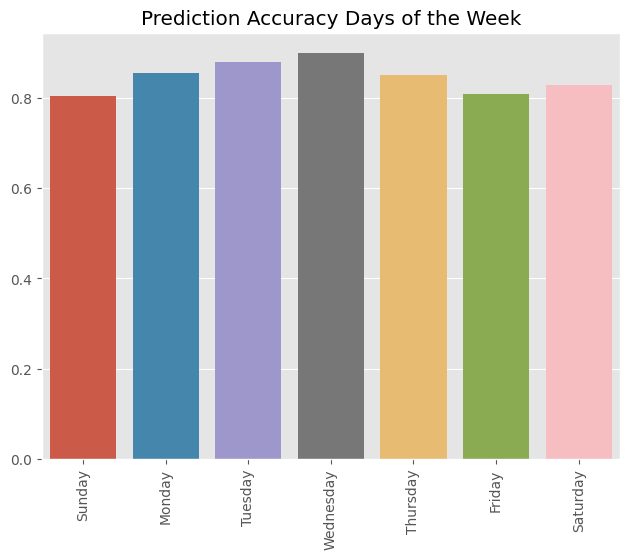

In [40]:
fig, ax = plt.subplots()
sns.barplot(x=weekday_accuracy[:, 0],
            y=weekday_accuracy[:, 1].astype(float), 
            order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
fig.tight_layout()
ax.set_title("Prediction Accuracy Days of the Week")
ax.tick_params(axis="x", rotation=90)
plt.savefig("week_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

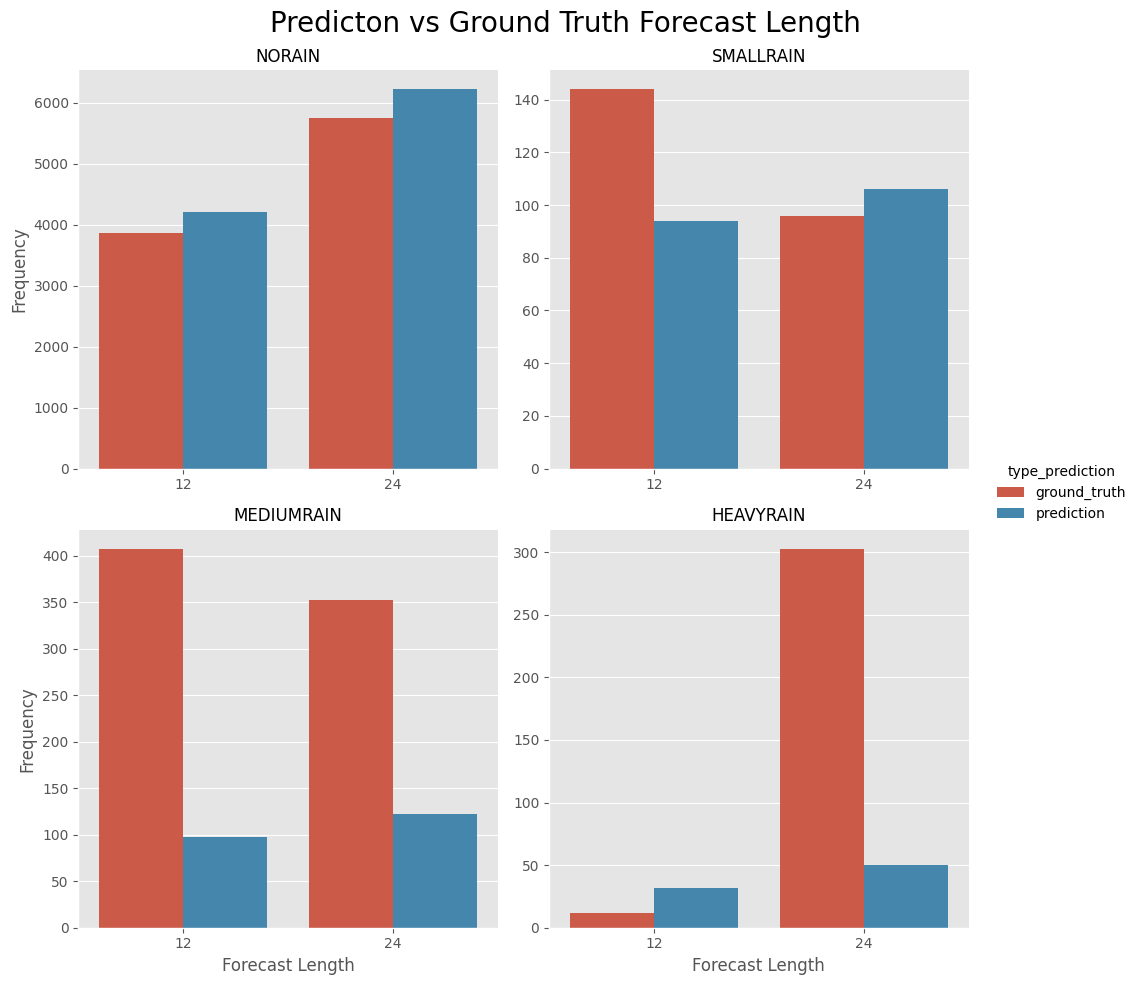

In [41]:
forecast_length_eda_data = prediction_target_combination("forecast_length", "predicted_intensity", "Target", eda_data)

g = sns.catplot(data=forecast_length_eda_data, 
                x='forecast_length', 
                y='frequency', 
                hue='type_prediction', 
                col='rainfall_intensity', 
                col_order = ['NORAIN', 'SMALLRAIN', 'MEDIUMRAIN', 'HEAVYRAIN'], 
                col_wrap=2, 
                sharex=False,
                sharey=False,
                kind='bar')
g.figure.suptitle("Predicton vs Ground Truth Forecast Length", size=20)
g.set_titles('{col_name}')
g.set_axis_labels("Forecast Length", "Frequency")
g.tight_layout()
plt.show()

---
### 👤 Farmer Skill

* Do some farmers (`user_id`) consistently make better forecasts?
* Is higher **confidence** actually linked to higher accuracy?
---

In [42]:
user_correct_prediction = {11: [0, 0], 17: [0, 0], 19: [0, 0], 23: [0, 0], 24: [0, 0], 20: [0, 0], 16: [0, 0], 27: [0, 0], 
                          22: [0, 0],  8: [0, 0],  7: [0, 0], 42: [0, 0], 26: [0, 0], 51: [0, 0], 45: [0, 0],  9: [0, 0], 
                          46: [0, 0], 59: [0, 0], 53: [0, 0], 47: [0, 0], 30: [0, 0], 62: [0, 0], 63: [0, 0], 64: [0, 0], 
                          18: [0, 0], 44: [0, 0], 43: [0, 0], 25: [0, 0], 57: [0, 0], 66: [0, 0], 69: [0, 0], 67: [0, 0], 
                          72: [0, 0], 77: [0, 0], 79: [0, 0], 80: [0, 0], 81: [0, 0], 85: [0, 0], 84: [0, 0], 76: [0, 0], 
                          78: [0, 0], 90: [0, 0], 88: [0, 0]}
farmer_accuracy = calculate_grouped_accuracy(user_correct_prediction, 1, eda_data)

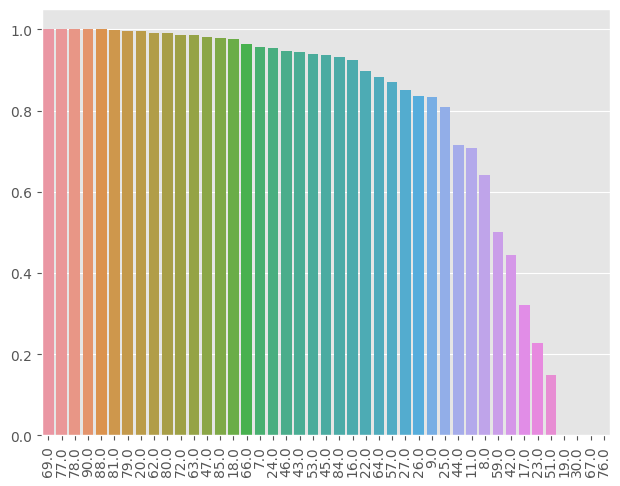

In [43]:
fig, ax = plt.subplots()
sns.barplot(x=farmer_accuracy[:, 0].astype(str), y=farmer_accuracy[:, 1])
fig.tight_layout()
ax.tick_params(axis="x", rotation=90)
plt.show()

---
### 🐦 Natural Indicators

* Which natural signs (`indicator` / `indicator_description`) are most commonly used?
* Which indicators correlate most strongly with actual rainfall events?
---

In [44]:
indicator_present = eda_data.loc[~eda_data["indicator"].isnull()]
indicator_absent = eda_data.loc[eda_data["indicator"].isnull()]

In [45]:
display(indicator_present["indicator"].value_counts())

indicator
clouds       266
sun           90
heat          53
fog           27
wind          25
moon          19
dew            9
star           8
thunder        4
lightning      2
Name: count, dtype: int64

In [52]:
print(f"Accuracy with indicator: {f1_score(indicator_present['Target'], indicator_present['predicted_intensity'], average=None)}")
print(f"Accuracy without indicator: {f1_score(indicator_absent['Target'], indicator_absent['predicted_intensity'], average=None)}")

Accuracy with indicator: [0.14736842 0.1532567  0.         0.10041841]
Accuracy without indicator: [0.         0.         0.93768788 0.        ]


In [ ]:
indicator_correct_prediction = {'heat': [0, 0], 'sun': [0, 0], 'clouds': [0, 0], 
                               'wind': [0, 0], 'dew': [0, 0], 'fog': [0, 0], 
                               'star': [0, 0], 'thunder': [0, 0],'moon': [0, 0],
                               'lightning': [0, 0]}
indicator_accuracy = calculate_grouped_accuracy(indicator_correct_prediction, 7, indicator_present)

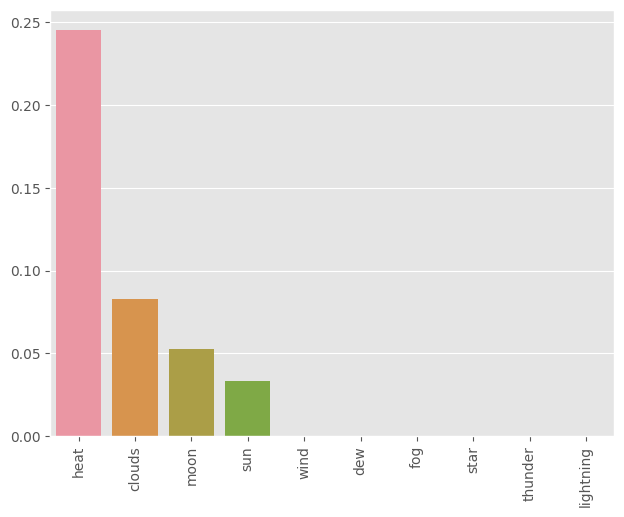

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=indicator_accuracy[:, 0], y=indicator_accuracy[:, 1].astype(float))
fig.tight_layout()
ax.tick_params(axis="x", rotation=90)
plt.show()

---
### 🔗 Feature Relationships

* How does predicted intensity (`predicted_intensity`) compare with actual rainfall (`Target`)?
* What is the relationship between **confidence** and correctness?

---

In [ ]:
# We're calculating farmer's prediction accuracy
print(f"Farmer's prediction accuracy: {f1_score(eda_data['Target'], eda_data['predicted_intensity'], average='macro')}%")

Farmer's prediction accuracy: 0.2622598983671946%


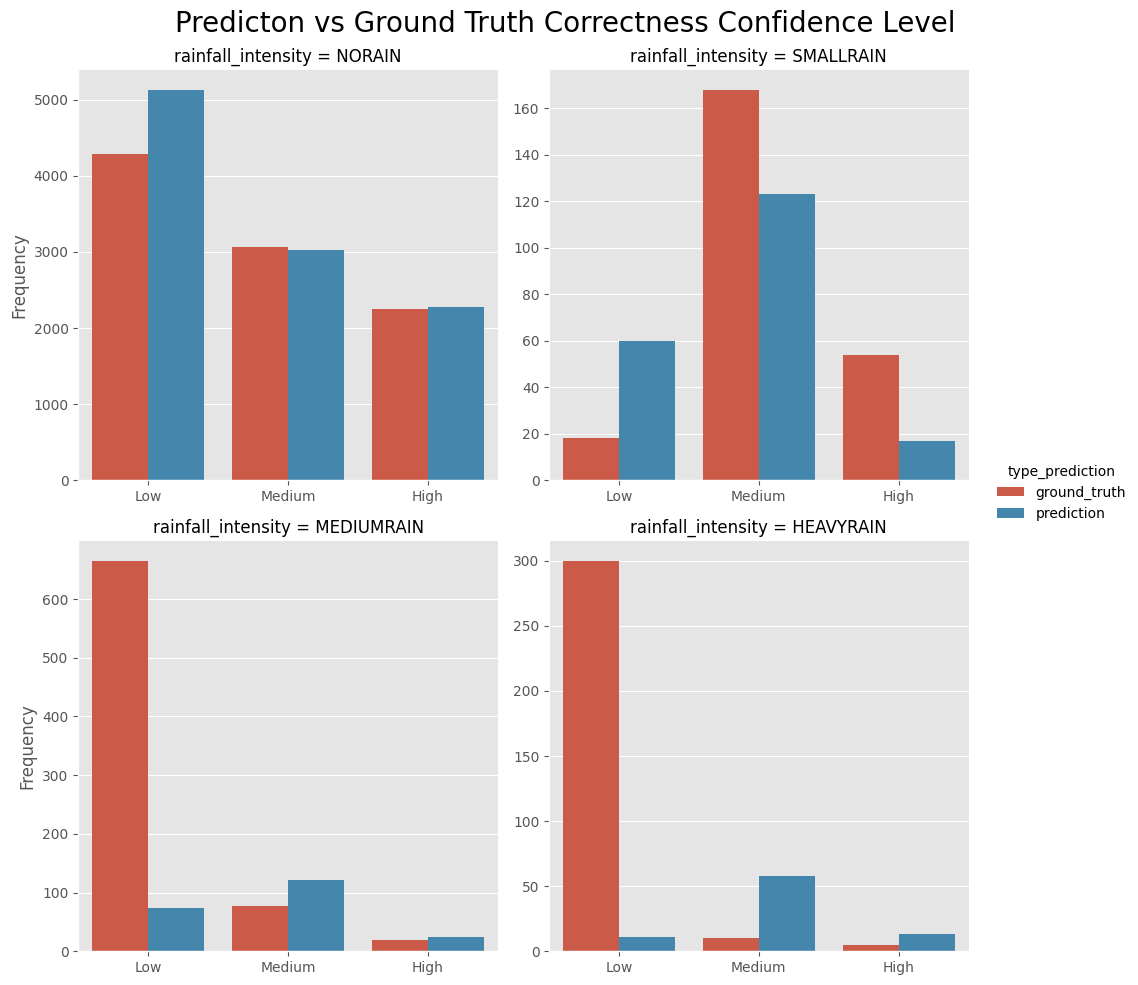

In [ ]:
confidence_eda_data = prediction_target_combination("confidence", "predicted_intensity", "Target", eda_data)

g = sns.catplot(data=confidence_eda_data, 
                x='confidence', 
                y='frequency', 
                order=['Low', 'Medium', 'High'], 
                hue='type_prediction', 
                col='rainfall_intensity', 
                col_order = ['NORAIN', 'SMALLRAIN', 'MEDIUMRAIN', 'HEAVYRAIN'], 
                col_wrap=2, 
                sharex=False,
                sharey=False,
                kind='bar')
g.figure.suptitle("Predicton vs Ground Truth Correctness Confidence Level", size=20)
g.set_axis_labels("", "Frequency")
g.tight_layout()
plt.show()